In [390]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [391]:
house = pd.read_csv('Boston.csv', index_col='Unnamed: 0')
house.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [392]:
import seaborn as sns
#sns.heatmap(house, annot=True)
#This was not made for any purpose apart from checking for na values

In [393]:
house.info() #Also to check for na values (na = string)
house.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
medv       0
dtype: int64

AxesSubplot(0.125,0.11;0.775x0.77)


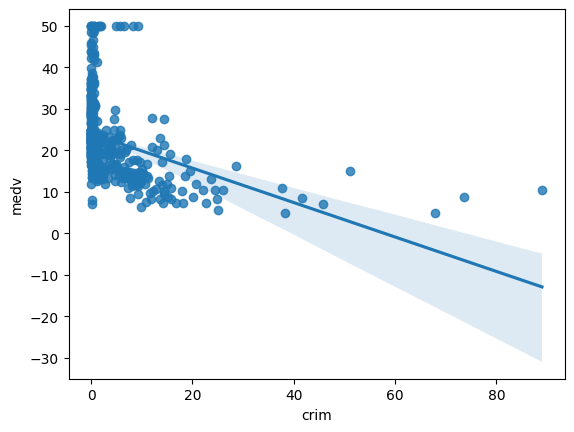

AxesSubplot(0.125,0.11;0.775x0.77)


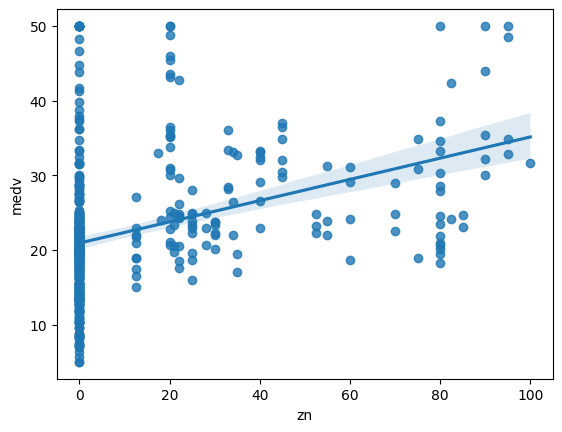

AxesSubplot(0.125,0.11;0.775x0.77)


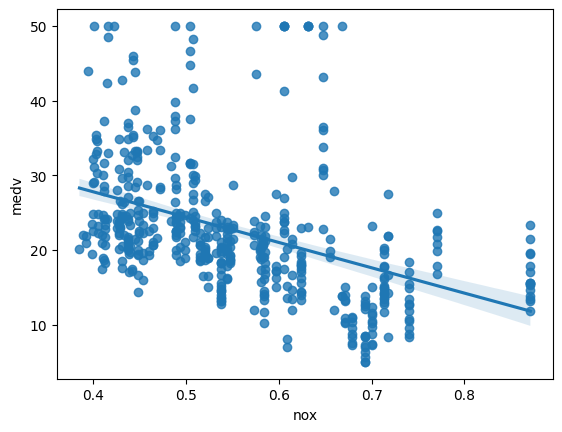

AxesSubplot(0.125,0.11;0.775x0.77)


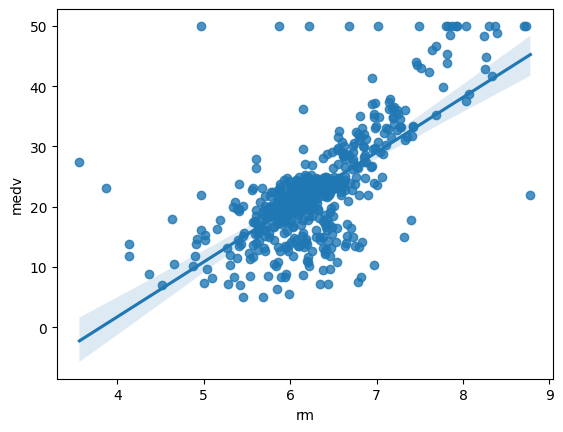

AxesSubplot(0.125,0.11;0.775x0.77)


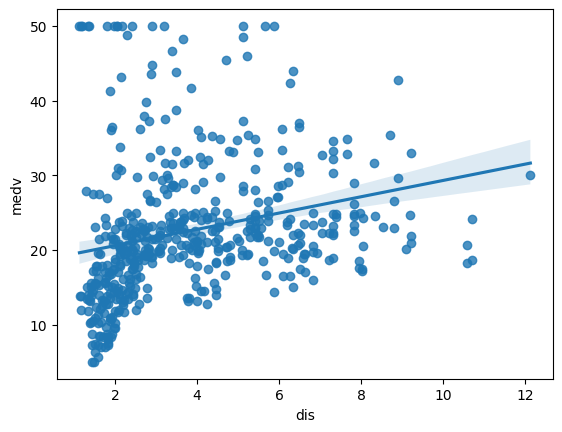

AxesSubplot(0.125,0.11;0.775x0.77)


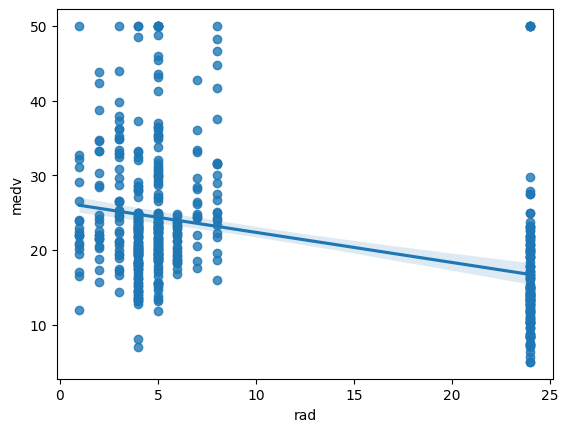

AxesSubplot(0.125,0.11;0.775x0.77)


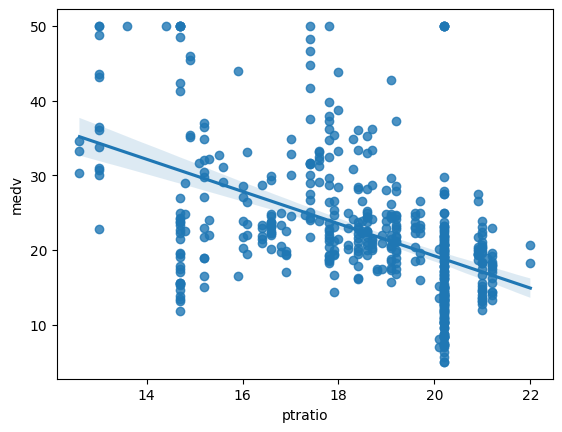

AxesSubplot(0.125,0.11;0.775x0.77)


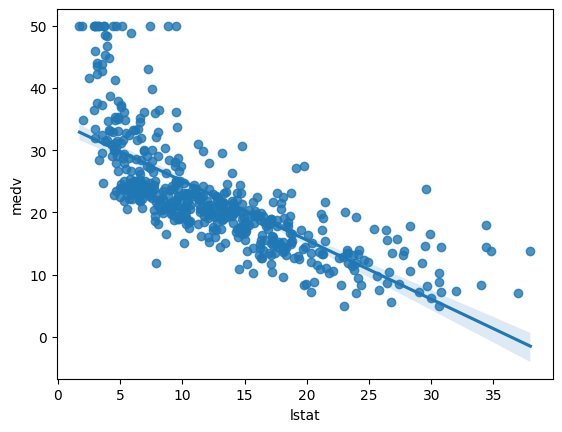

In [394]:
for i in house.drop(columns=['medv', 'chas', 'tax', 'indus', 'age']):
    print(sns.regplot(x=house[i], y=house.medv))
    plt.show()

In [395]:
print(house.ptratio.unique())
print(house.rad.unique())
print(house.zn.unique())

[15.3 17.8 18.7 15.2 21.  19.2 18.3 17.9 16.8 21.1 17.3 15.1 19.7 18.6
 16.1 18.9 19.  18.5 18.2 18.  20.9 19.1 21.2 14.7 16.6 15.6 14.4 12.6
 17.  16.4 17.4 15.9 13.  17.6 14.9 13.6 16.  14.8 18.4 19.6 16.9 20.2
 15.5 18.8 22.  20.1]
[ 1  2  3  5  4  8  6  7 24]
[ 18.    0.   12.5  75.   21.   90.   85.  100.   25.   17.5  80.   28.
  45.   60.   95.   82.5  30.   22.   20.   40.   55.   52.5  70.   34.
  33.   35. ]


<AxesSubplot:xlabel='zn', ylabel='medv'>

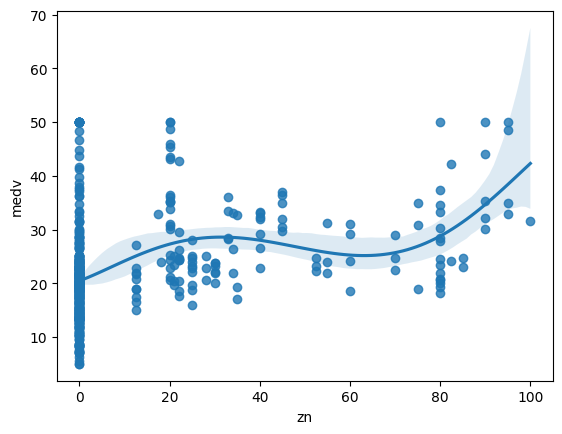

In [396]:
sns.regplot(x=house.zn, y=house.medv, order=5)

<AxesSubplot:xlabel='dis', ylabel='medv'>

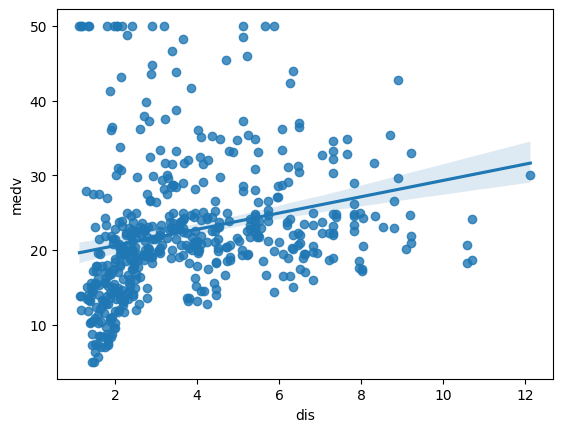

In [397]:
sns.regplot(x=house.dis, y=house.medv, order=1)

In [398]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
houseQuant = add_constant(house.drop(columns=['medv', 'chas']))
vif = pd.DataFrame()
vif['Feature_Vars'] = houseQuant.columns
vif['VIF'] = [variance_inflation_factor(houseQuant, i) for i in range (len(houseQuant.columns))]
vif

,Feature_Vars,VIF
0,const,534.484936
1,crim,1.761839
2,zn,2.297916
3,indus,3.946114
4,nox,4.365205
5,rm,1.911242
6,age,3.079151
7,dis,3.952905
8,rad,7.364313
9,tax,8.866477


In [399]:
houseQuant = add_constant(house.drop(columns=['medv', 'chas', 'tax']))
vif = pd.DataFrame()
vif['Feature_Vars'] = houseQuant.columns
vif['VIF'] = [variance_inflation_factor(houseQuant, i) for i in range (len(houseQuant.columns))]
vif

,Feature_Vars,VIF
0,const,528.955729
1,crim,1.761833
2,zn,2.183835
3,indus,3.208793
4,nox,4.341454
5,rm,1.900290
6,age,3.077680
7,dis,3.950936
8,rad,2.771834
9,ptratio,1.768335


In [400]:
from sklearn.preprocessing import scale
houseScaled = house.copy()
for i in house.drop(columns=['medv', 'chas']).columns:
    houseScaled[i] = scale(house[i], with_mean=True, with_std=True)

houseScaled.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,-0.419782,0.284830,-1.287909,0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,-1.075562,24.0
2,-0.417339,-0.487722,-0.593381,0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,-0.492439,21.6
3,-0.417342,-0.487722,-0.593381,0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,-1.208727,34.7
4,-0.416750,-0.487722,-1.306878,0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,-1.361517,33.4
5,-0.412482,-0.487722,-1.306878,0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,-1.026501,36.2


In [401]:
import statsmodels.formula.api as smf
fit1 = smf.ols('medv~crim+zn+indus+nox+rm+age+dis+rad+ptratio+lstat', data=houseScaled).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     127.9
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          2.90e-130
Time:                        22:10:59   Log-Likelihood:                -1517.3
No. Observations:                 506   AIC:                             3057.
Df Residuals:                     495   BIC:                             3103.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.5328      0.218    103.284      0.000      22.104      22.961
crim          -1.0934      0.290     -3.776      0.000      -1.662      -0.524
zn             0.8391      0.322      2.603      0.010       0.206       1.473
indus         -0.4563      0.391     -1.168      0.244      -1.224       0.312
nox           -2.2519      0.455     -4.954      0.000      -3.145      -1.359
rm             2.6768      0.301      8.901      0.000       2.086       3.268
age            0.1371      0.383      0.358      0.720      -0.615       0.889
dis           -3.1951      0.434     -7.368      0.000      -4.047      -2.343
rad            0.9943      0.363      2.737      0.006       0.281       1.708
ptratio       -2.2069      0.290     -7.607      0.000      -2.777      -1.637
lstat         -4.0146      0.369    -10.886      0.000      -4.739      -3.290
==============================================================================
Omnibus:                      174.221   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              728.645
Skew:                           1.504   Prob(JB):                    5.98e-159
Kurtosis:                       8.051   Cond. No.                         5.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [402]:
fit2 = smf.ols('medv~crim+I(zn+zn**2+zn**3+zn**4+zn**5)+indus+nox+rm+dis+rad+ptratio+lstat', data=houseScaled).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.720
Method:                 Least Squares   F-statistic:                     145.2
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          7.23e-133
Time:                        22:11:00   Log-Likelihood:                -1513.8
No. Observations:                 506   AIC:                             3048.
Df Residuals:                     496   BIC:                             3090.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        22.2976      0.225     98.933      0.000      21.855      22.740
crim                                             -1.1007      0.287     -3.838      0.000      -1.664      -0.537
I(zn + zn ** 2 + zn ** 3 + zn ** 4 + zn ** 5)     0.0074      0.002      3.735      0.000       0.003       0.011
indus                                            -0.5106      0.388     -1.317      0.188      -1.272       0.251
nox                                              -2.2490      0.434     -5.182      0.000      -3.102      -1.396
rm                                                2.6593      0.292      9.104      0.000       2.085       3.233
dis                                              -3.1667      0.380     -8.341      0.000      -3.913      -2.421
rad                                               1.0301      0.356      2.892      0.004       0.330       1.730
ptratio                                          -2.2725      0.276     -8.244      0.000      -2.814      -1.731
lstat                                            -3.9907      0.345    -11.569      0.000      -4.668      -3.313
==============================================================================
Omnibus:                      178.599   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.553
Skew:                           1.528   Prob(JB):                    1.18e-170
Kurtosis:                       8.271   Cond. No.                         319.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [403]:
ypred = fit2.predict()
np.sum(np.square(ypred-houseScaled.medv))

11753.812457875543

In [404]:
#splitting into 80:20
print(houseScaled.shape[0])
print(0.8*houseScaled.shape[0])
print(houseScaled.shape[0]-(0.8*houseScaled.shape[0]))

506
404.8
101.19999999999999


In [405]:
np.random.seed(90)
indices = np.random.choice(houseScaled.shape[0], 405, replace=False)
choices = np.in1d(range(houseScaled.shape[0]), indices)
train = houseScaled[choices]
test = houseScaled[~choices]

In [409]:
fitTrain = smf.ols('medv~crim+I(zn+zn**2+zn**3+zn**4+zn**5)+indus+nox+rm+dis+rad+ptratio+lstat', data=train).fit()
fitTrain.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     123.2
Date:                Thu, 20 Apr 2023   Prob (F-statistic):          7.61e-109
Time:                        22:14:05   Log-Likelihood:                -1218.3
No. Observations:                 405   AIC:                             2457.
Df Residuals:                     395   BIC:                             2497.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                        22.4295      0.257     87.410      0.000      21.925      22.934
crim                                             -1.1726      0.299     -3.926      0.000      -1.760      -0.585
I(zn + zn ** 2 + zn ** 3 + zn ** 4 + zn ** 5)     0.0071      0.002      3.287      0.001       0.003       0.011
indus                                            -0.4593      0.451     -1.018      0.309      -1.346       0.428
nox                                              -1.9700      0.488     -4.041      0.000      -2.929      -1.011
rm                                                2.7690      0.319      8.673      0.000       2.141       3.397
dis                                              -3.1641      0.430     -7.359      0.000      -4.009      -2.319
rad                                               1.3086      0.399      3.280      0.001       0.524       2.093
ptratio                                          -2.2476      0.316     -7.115      0.000      -2.869      -1.627
lstat                                            -4.5655      0.385    -11.843      0.000      -5.323      -3.808
==============================================================================
Omnibus:                      136.598   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              518.823
Skew:                           1.472   Prob(JB):                    2.18e-113
Kurtosis:                       7.699   Cond. No.                         325.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""